# CPE 695 Spring 2024 Final Project

---  

#### By Brianna Cirillo, Christopher Kehoe, Aaron Vo
Description: The Heart Disease dataset is a subset of a larger database that contains 76 different attributes in relation to heart disease from the Cleveland, Hungary, Switzerland, and VA Long Beach databases. The subset of the data that we will be using is from the Cleveland database and has 303 subjects, with 14 variables that include one to determine the presence or absence of heart disease.



### Columns Description:

  1. age: (Age of the patient in years)
  2. sex: (Male/Female) (1 = male; 0 = female)
  3. cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
  4. restbp: resting blood pressure (resting blood pressure (in mm Hg on 6. admission to the hospital))
  5. chol: (serum cholesterol in mg/dl)
  6. fbs: (if fasting blood sugar > 120 mg/dl)
    - Value 1: True
    - Value 0: False
  7. restecg: (resting electrocardiographic results)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST   elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy      by Estes' criteria
  8. thalach: maximum heart rate achieved
  9. exang: exercise-induced angina (True/ False)
  10. oldpeak: ST depression induced by exercise relative to rest
  11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
  12. ca: number of major vessels (0-3) colored by fluoroscopy
  13. thal: [3 = normal; 6= fixed defect; 7= reversible defect]
  14. num: the predicted attribute:  
      diagnosis of heart disease (angiographic disease status)
        - Value 0: < 50% diameter narrowing
        - Value 1: > 50% diameter narrowing.
        - (in any major vessel: attributes 59 through 68 are vessels)
        - Value 2: lmt
        - Value 3: ladprox
        - Value 4: laddist

      We will just use 0 for no disease and 1 for having a disease


## Importing / Data Cleaning

In [ ]:
# Import packages here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Reading the data fron CSV file using pandas and creating Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

df = pd.read_csv('/content/processed.cleveland.data', sep=',', header=None, names=columns)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Getting the shape of the data sets to confirm records and features
df.shape

(303, 14)

In [ ]:
# Insights on the data sets
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
# Check for empty values
df.isnull().any()

age        False
sex        False
cp         False
restbp     False
chol       False
fbs        False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca         False
thal       False
num        False
dtype: bool

In [ ]:
df.dtypes
count_question_marks = (df == '?').sum()
print("Number of '?' in each column:\n", count_question_marks)
df = df.apply(pd.to_numeric, errors='coerce')

Number of '?' in each column:
 age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64


In [ ]:
averages = df.apply(lambda col: col[col != '?'].mean())
df['ca'].fillna(averages['ca'], inplace=True)
df['thal'].fillna(averages['thal'], inplace=True)
df.isnull().any()

age        False
sex        False
cp         False
restbp     False
chol       False
fbs        False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca         False
thal       False
num        False
dtype: bool

In [ ]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df_formatted = df.drop(columns=['num']).copy()
df_formatted.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Exploratory Analysis

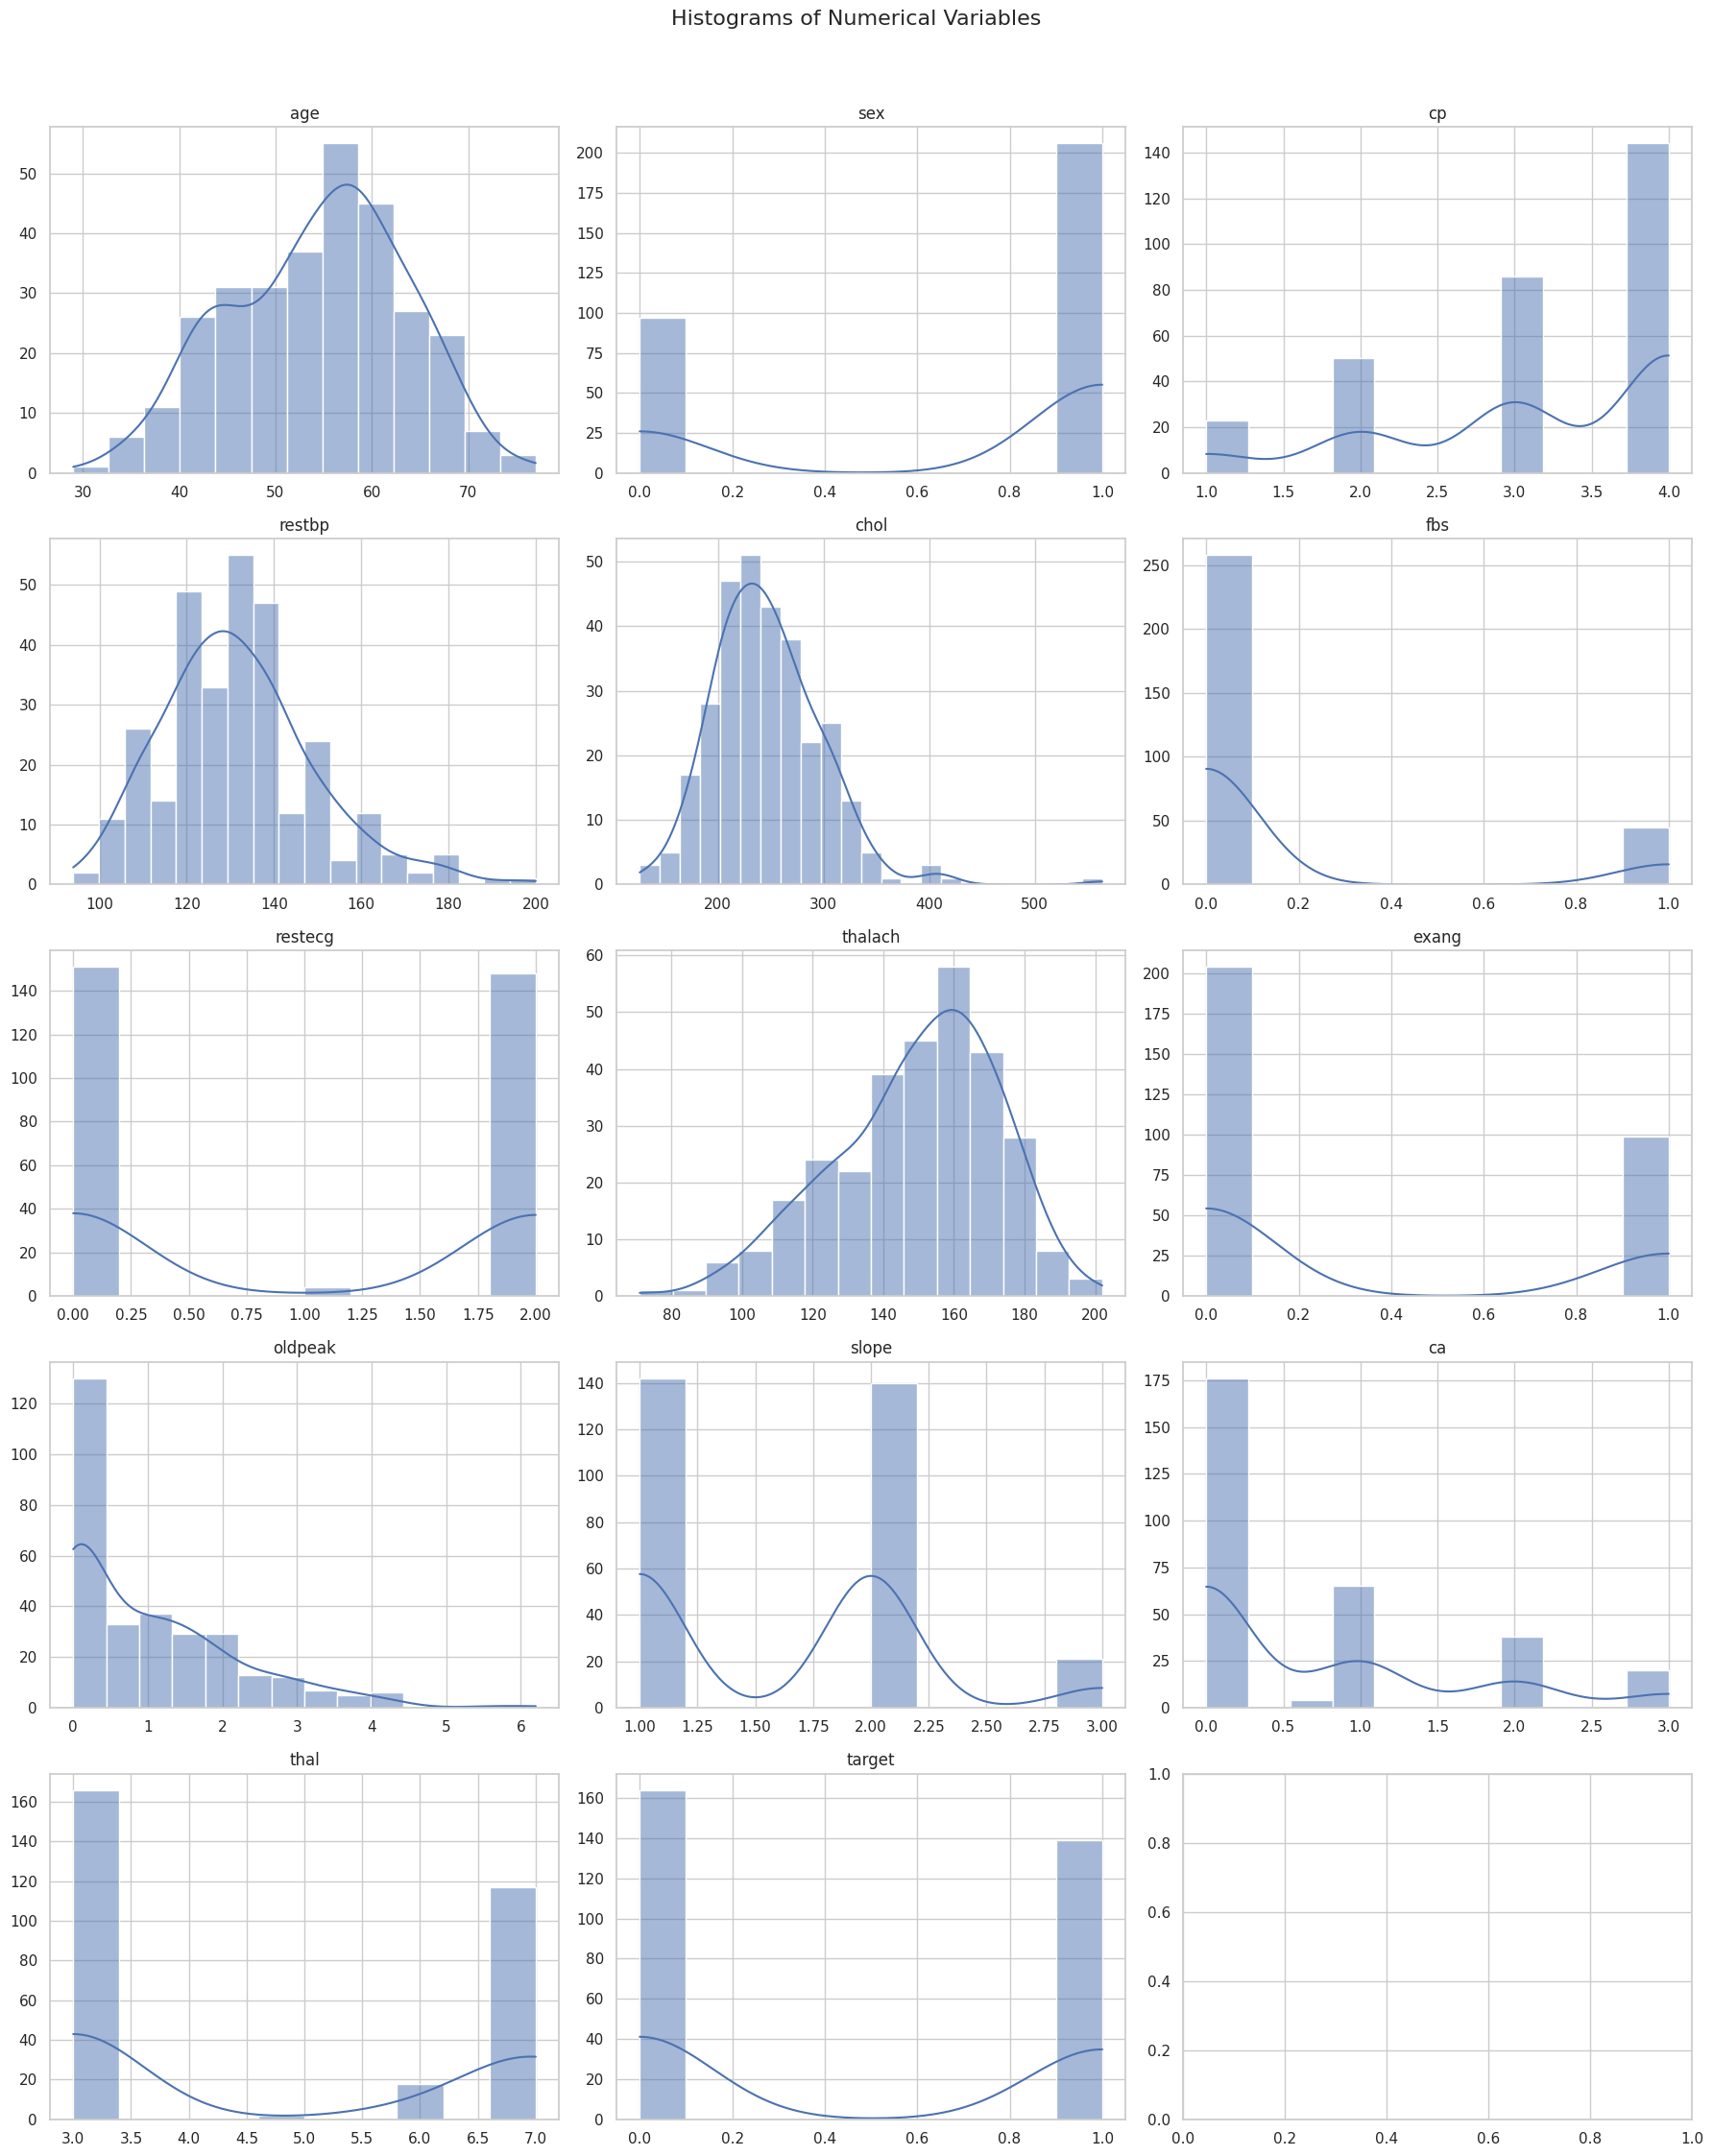

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Relabeling the columns
columns_new = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]


# Creating histograms for all numerical columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))
fig.suptitle('Histograms of Numerical Variables', fontsize=16, y=1.02)

for ax, column in zip(axes.flatten(), columns_new):
    sns.histplot(df_formatted[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

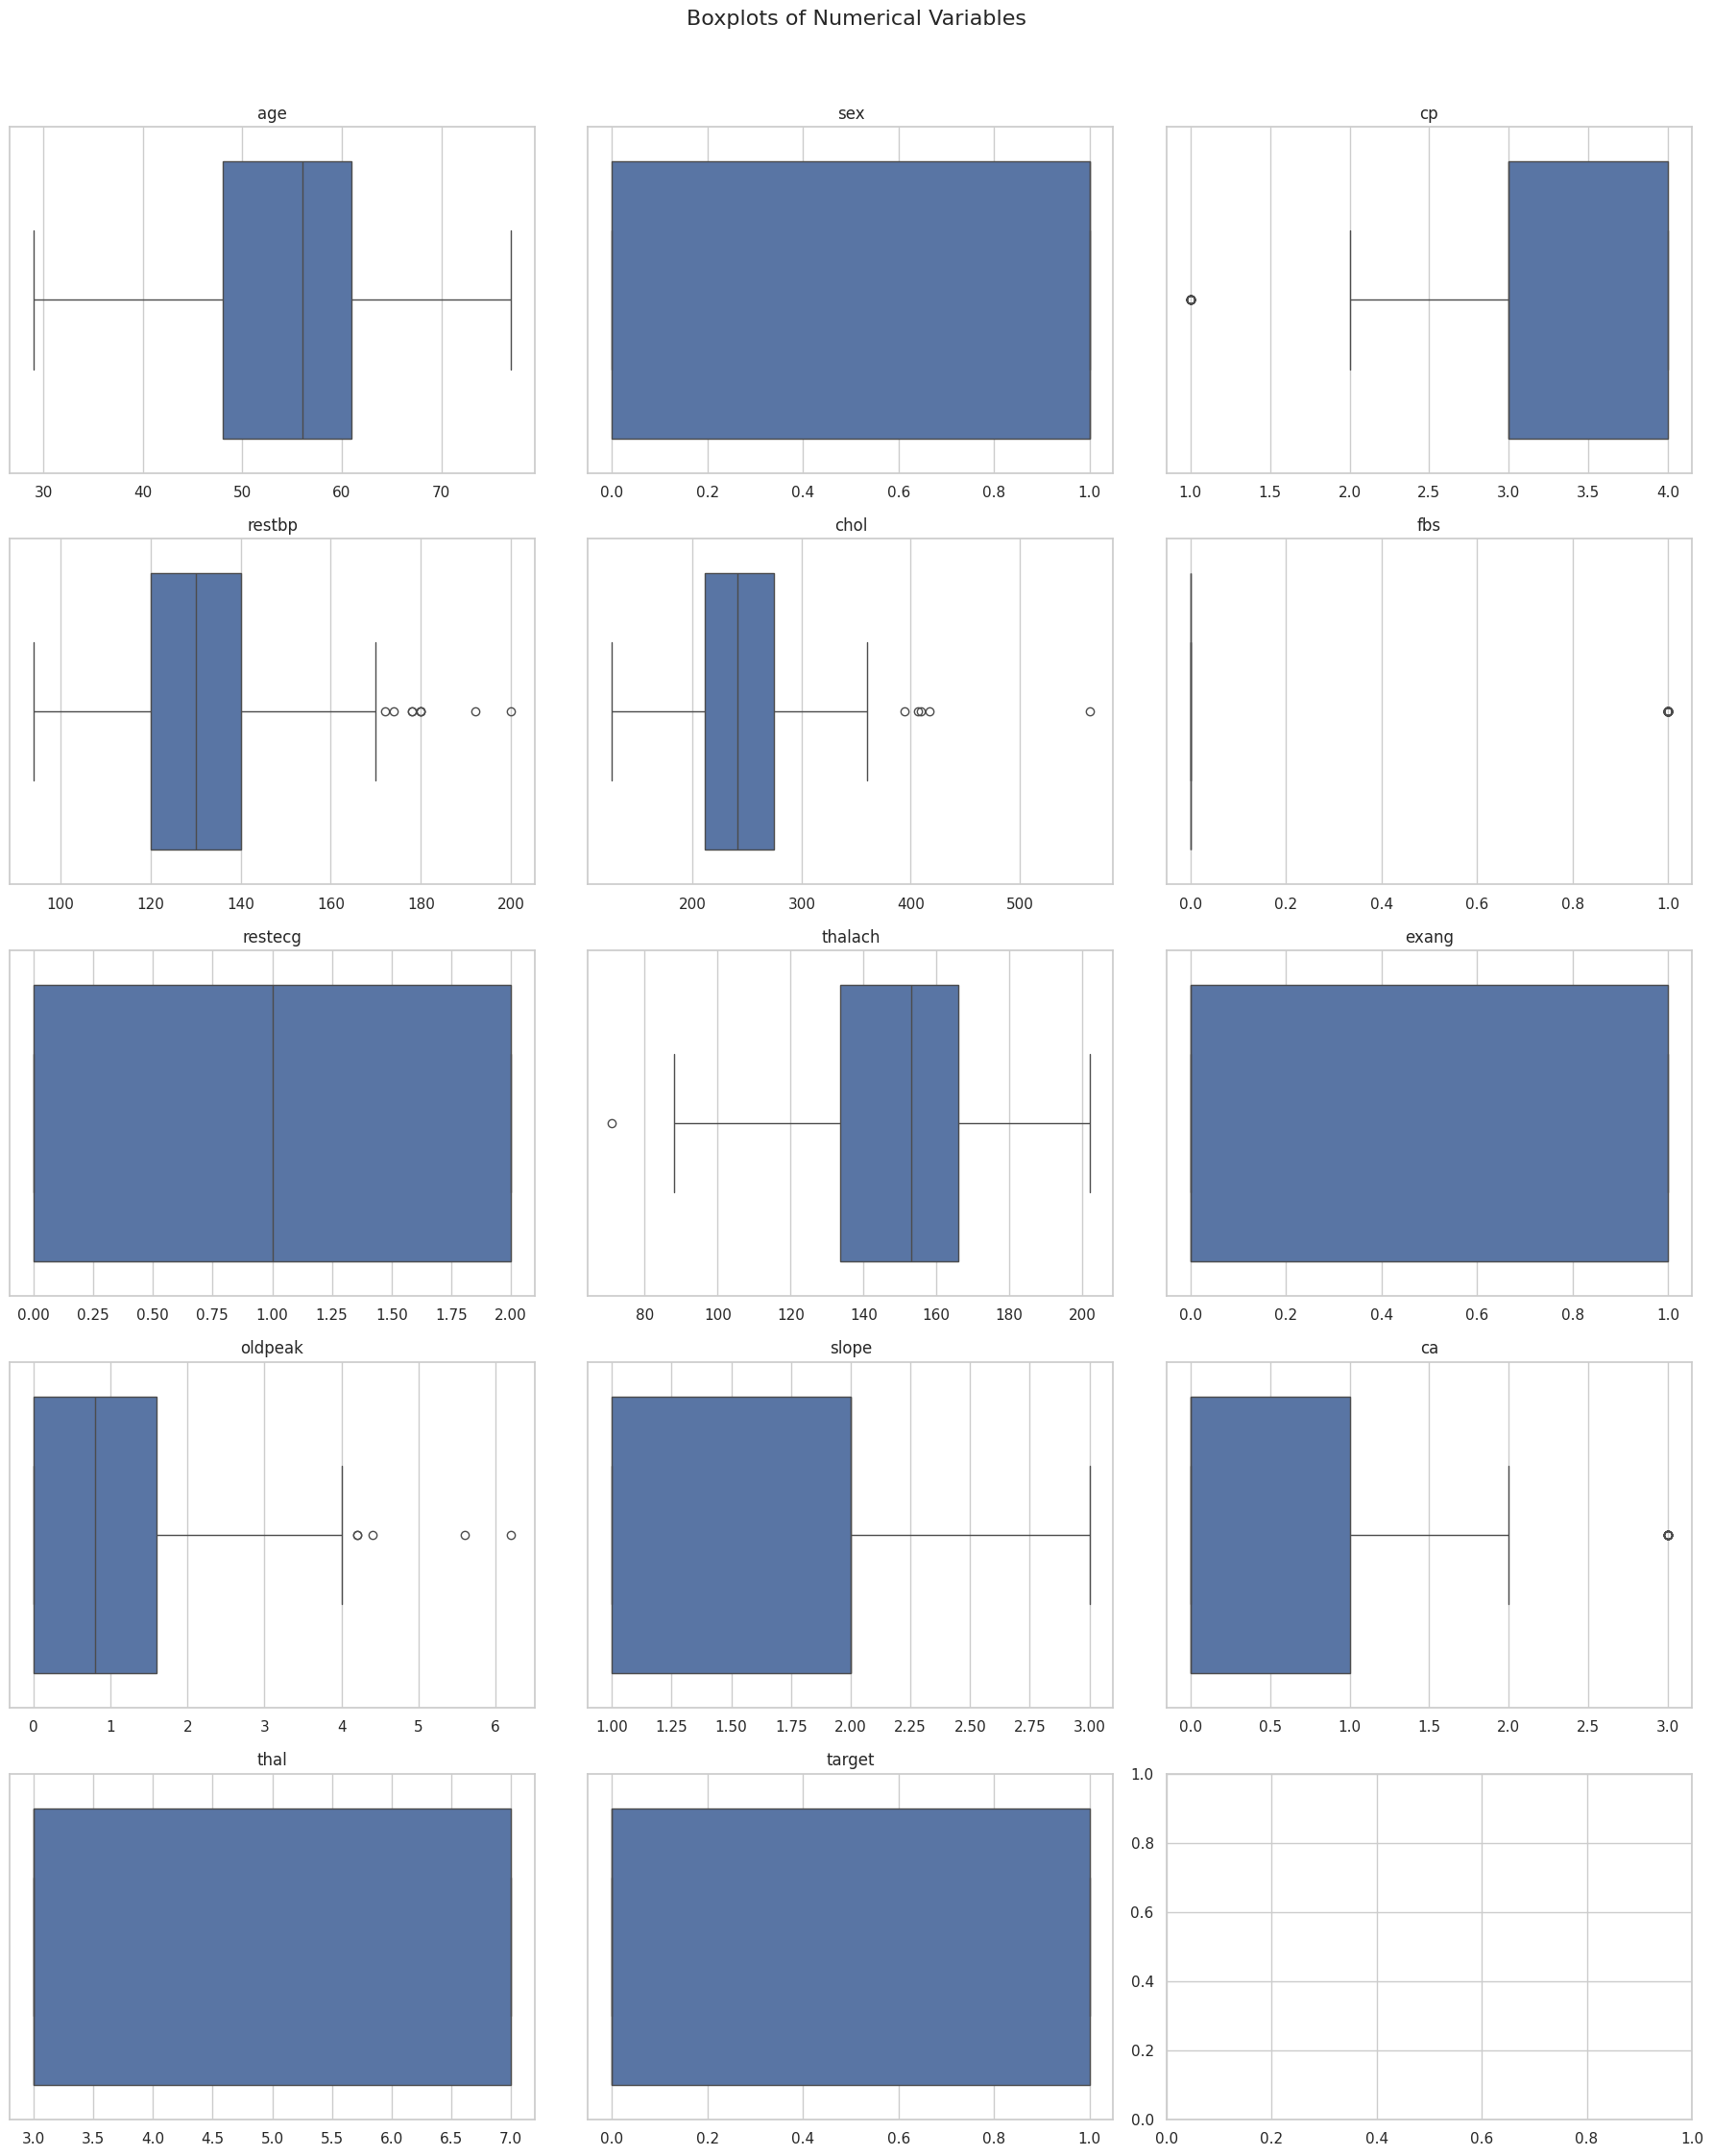

In [ ]:
# Creating boxplots for all numerical columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))
fig.suptitle('Boxplots of Numerical Variables', fontsize=16, y=1.02)

for ax, column in zip(axes.flatten(), columns_new):
    sns.boxplot(x=df_formatted[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


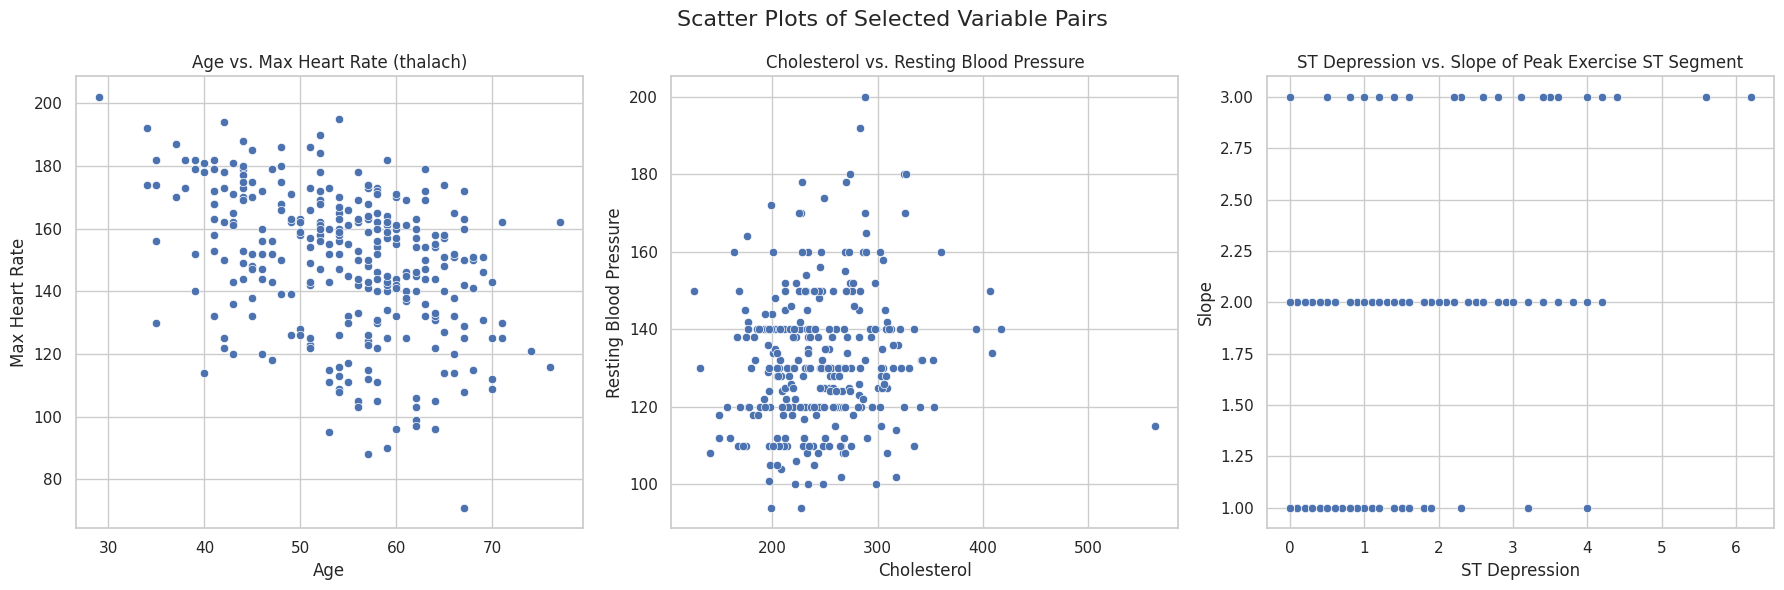

In [ ]:
# Creating scatter plots for selected pairs of variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Scatter Plots of Selected Variable Pairs', fontsize=16)

# Scatter plot of age vs. thalach
sns.scatterplot(x=df_formatted['age'], y=df_formatted['thalach'], ax=axes[0])
axes[0].set_title('Age vs. Max Heart Rate (thalach)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Max Heart Rate')

# Scatter plot of chol vs. trestbps
sns.scatterplot(x=df_formatted['chol'], y=df_formatted['restbp'], ax=axes[1])
axes[1].set_title('Cholesterol vs. Resting Blood Pressure')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Resting Blood Pressure')

# Scatter plot of oldpeak vs. slope
sns.scatterplot(x=df_formatted['oldpeak'], y=df_formatted['slope'], ax=axes[2])
axes[2].set_title('ST Depression vs. Slope of Peak Exercise ST Segment')
axes[2].set_xlabel('ST Depression')
axes[2].set_ylabel('Slope')

# Adjust layout
plt.tight_layout()
plt.show()


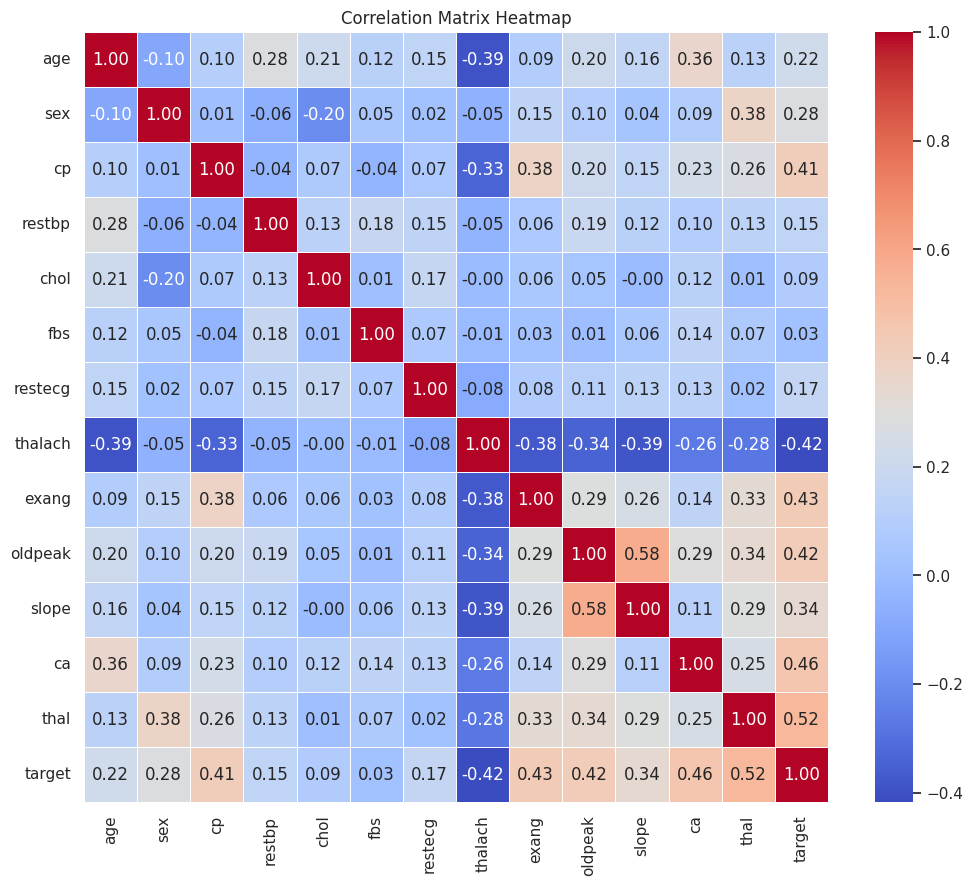

In [ ]:
# Computing the correlation matrix
correlation_matrix = df_formatted.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

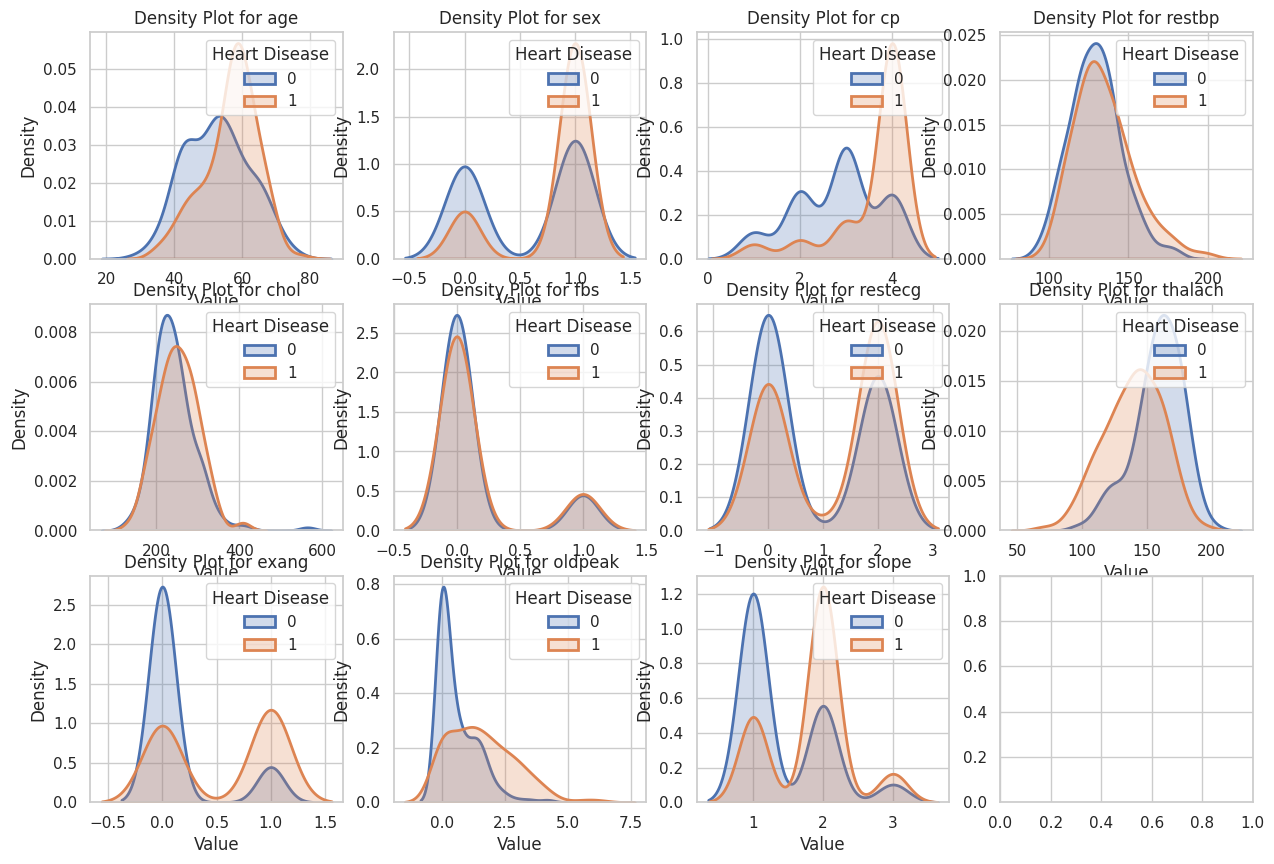

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [ ]:
features = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope"]

fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Plot density plot for each feature
for i, column in enumerate(features):
    row = i // 4
    col = i % 4
    plt.figure(figsize=(4, 4))
    sns.kdeplot(data=df_formatted[df_formatted["target"]==0], x=column, ax=axes[row, col], fill=True, linewidth=2, label='0')
    sns.kdeplot(data=df_formatted[df_formatted["target"]==1], x=column ,ax=axes[row, col], fill=True, linewidth=2, label='1')
    axes[row, col].set_title(f'Density Plot for {column}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend(title='Heart Disease', loc='upper right')

plt.tight_layout()
plt.show()


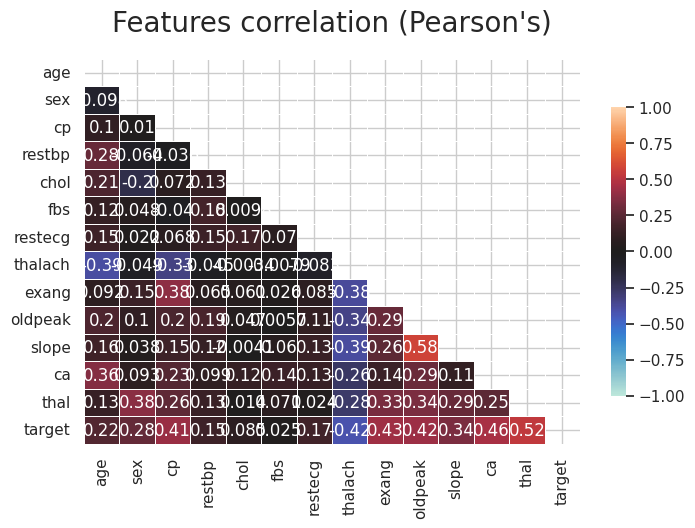

In [ ]:
# Compute the correlation matrix
corr_matrix = df_formatted.corr(method='pearson')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Features correlation (Pearson's)", fontsize=20, y= 1.05);

Splitting the data into a test and training dataset

In [ ]:
X = df_formatted.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, df_formatted['target'], test_size = 0.2, random_state = 5)


#### Decision tree model

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

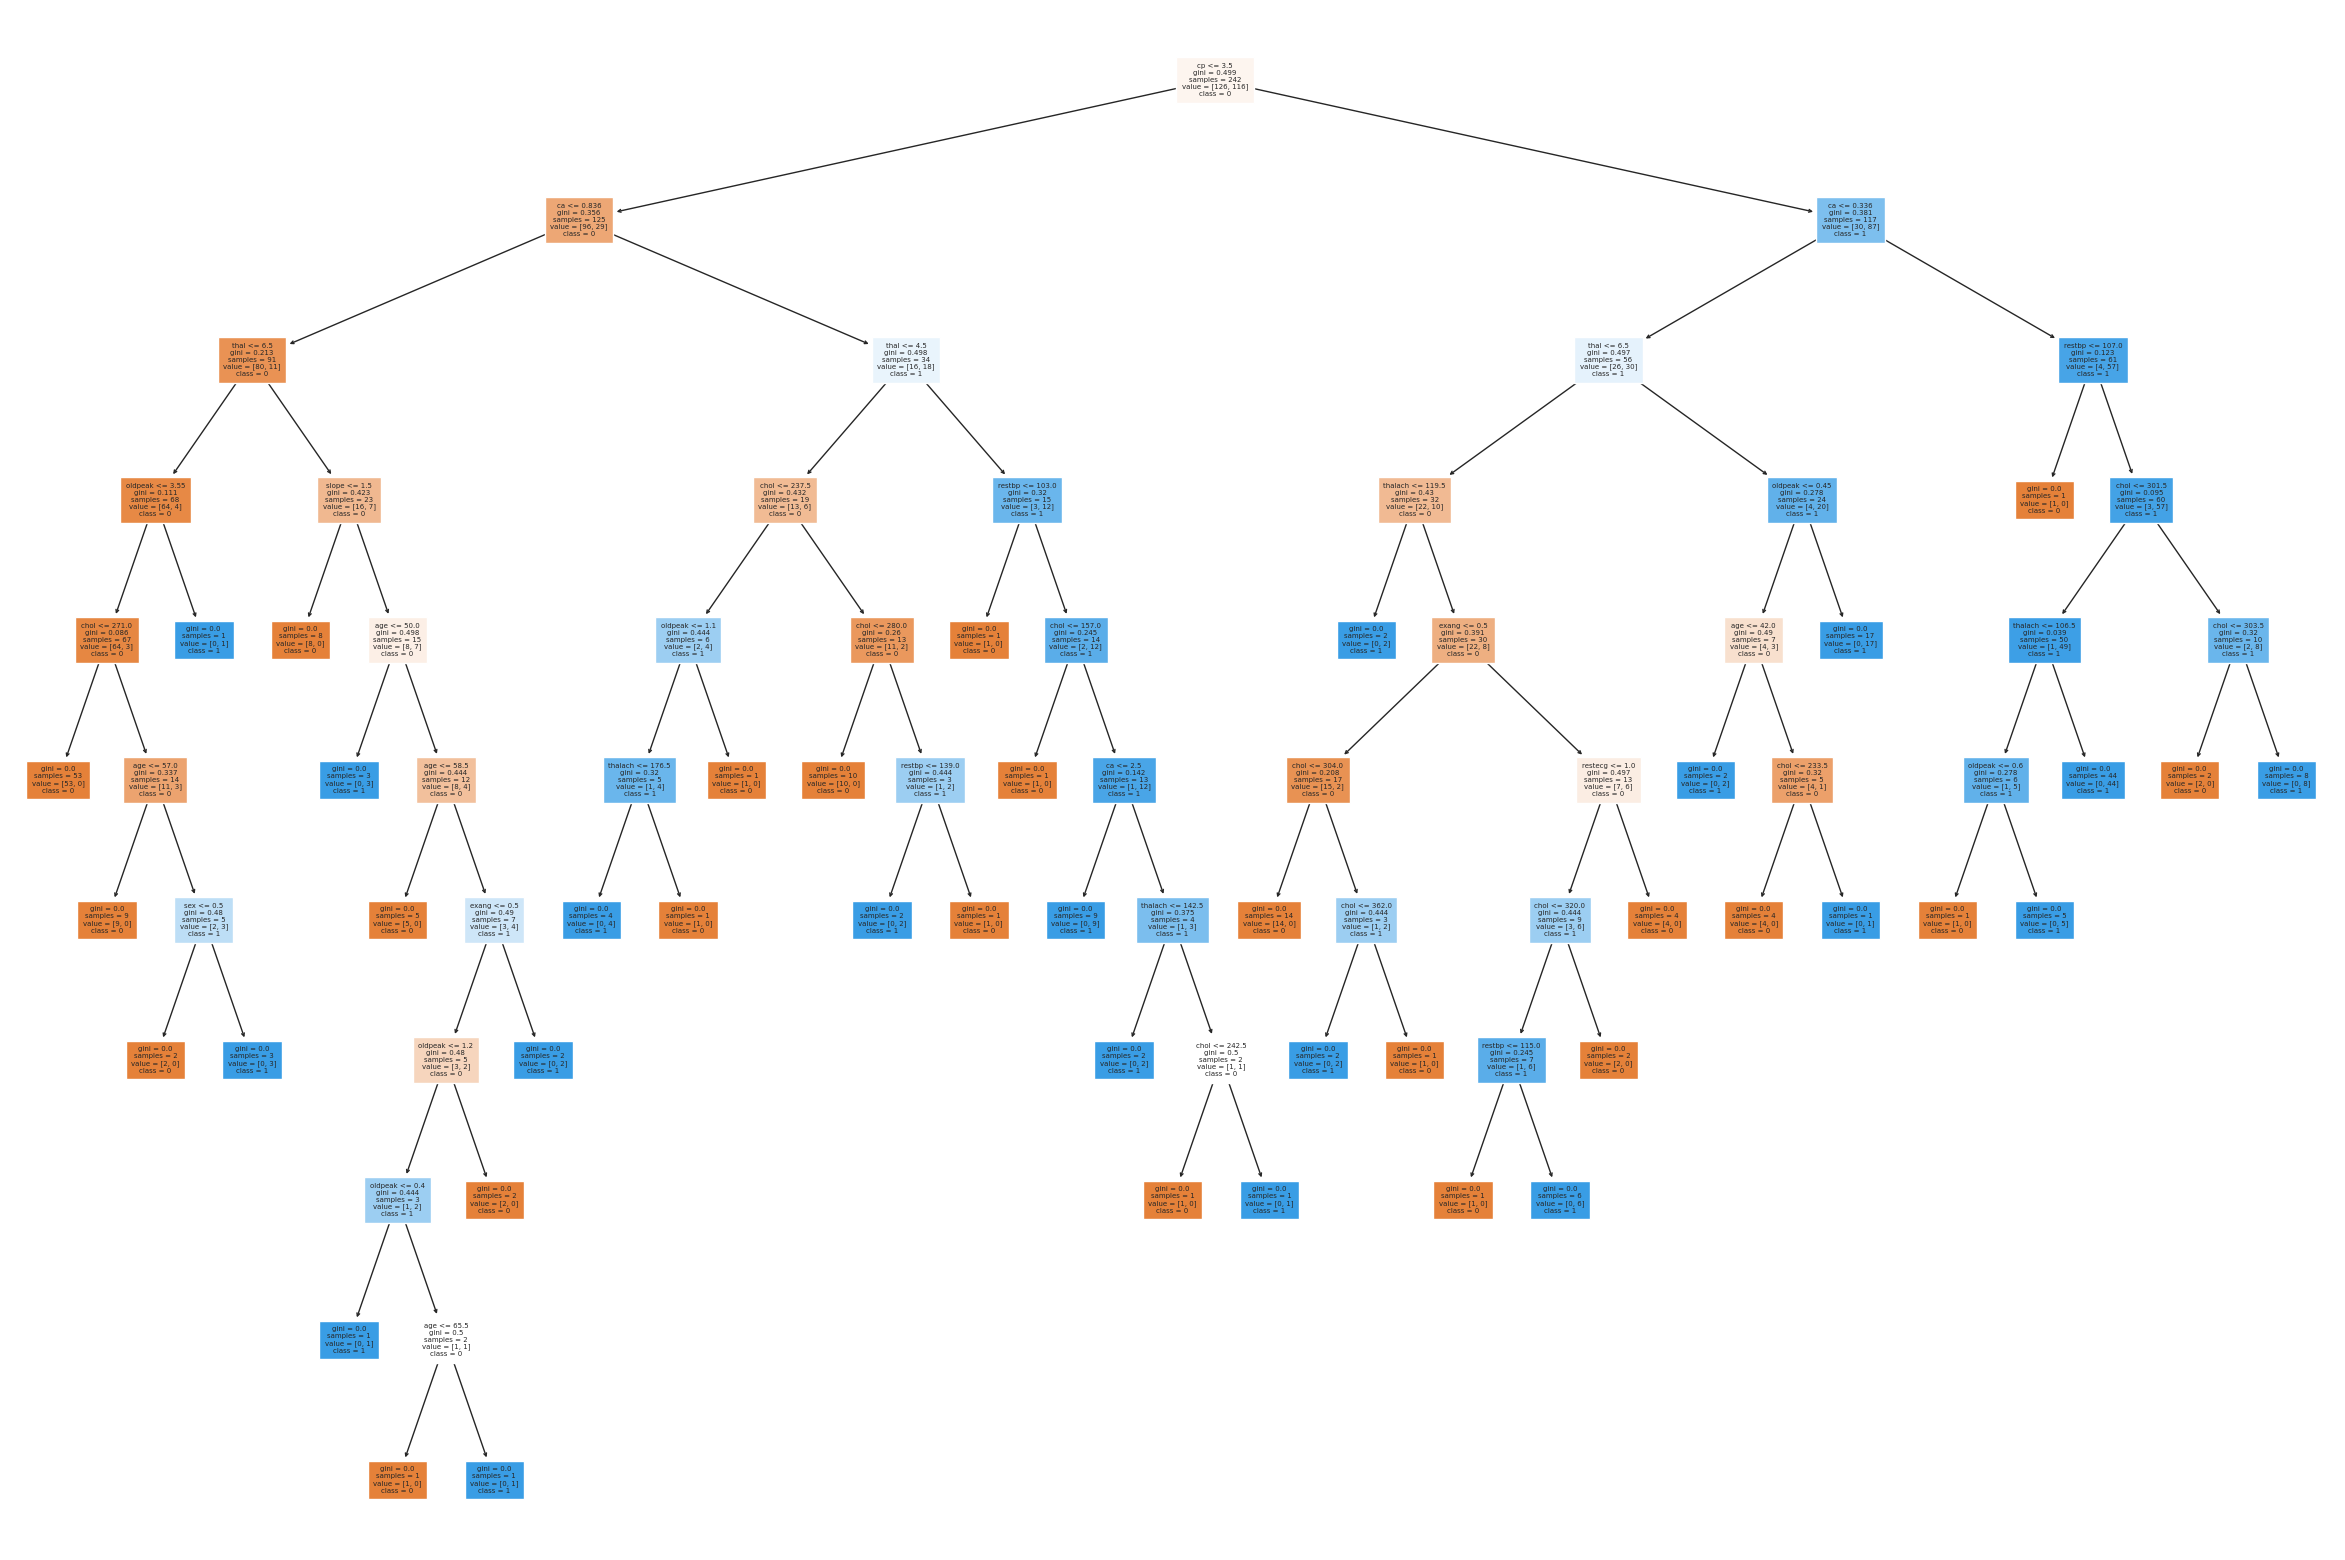

In [ ]:
# Plot the decision tree
plt.figure(figsize = (30, 20))
plot_tree(clf, filled = True, feature_names = X_train.columns, class_names = list(map(str, clf.classes_)), fontsize = 5)
plt.show()

Best Parameters: {'max_leaf_nodes': 20}


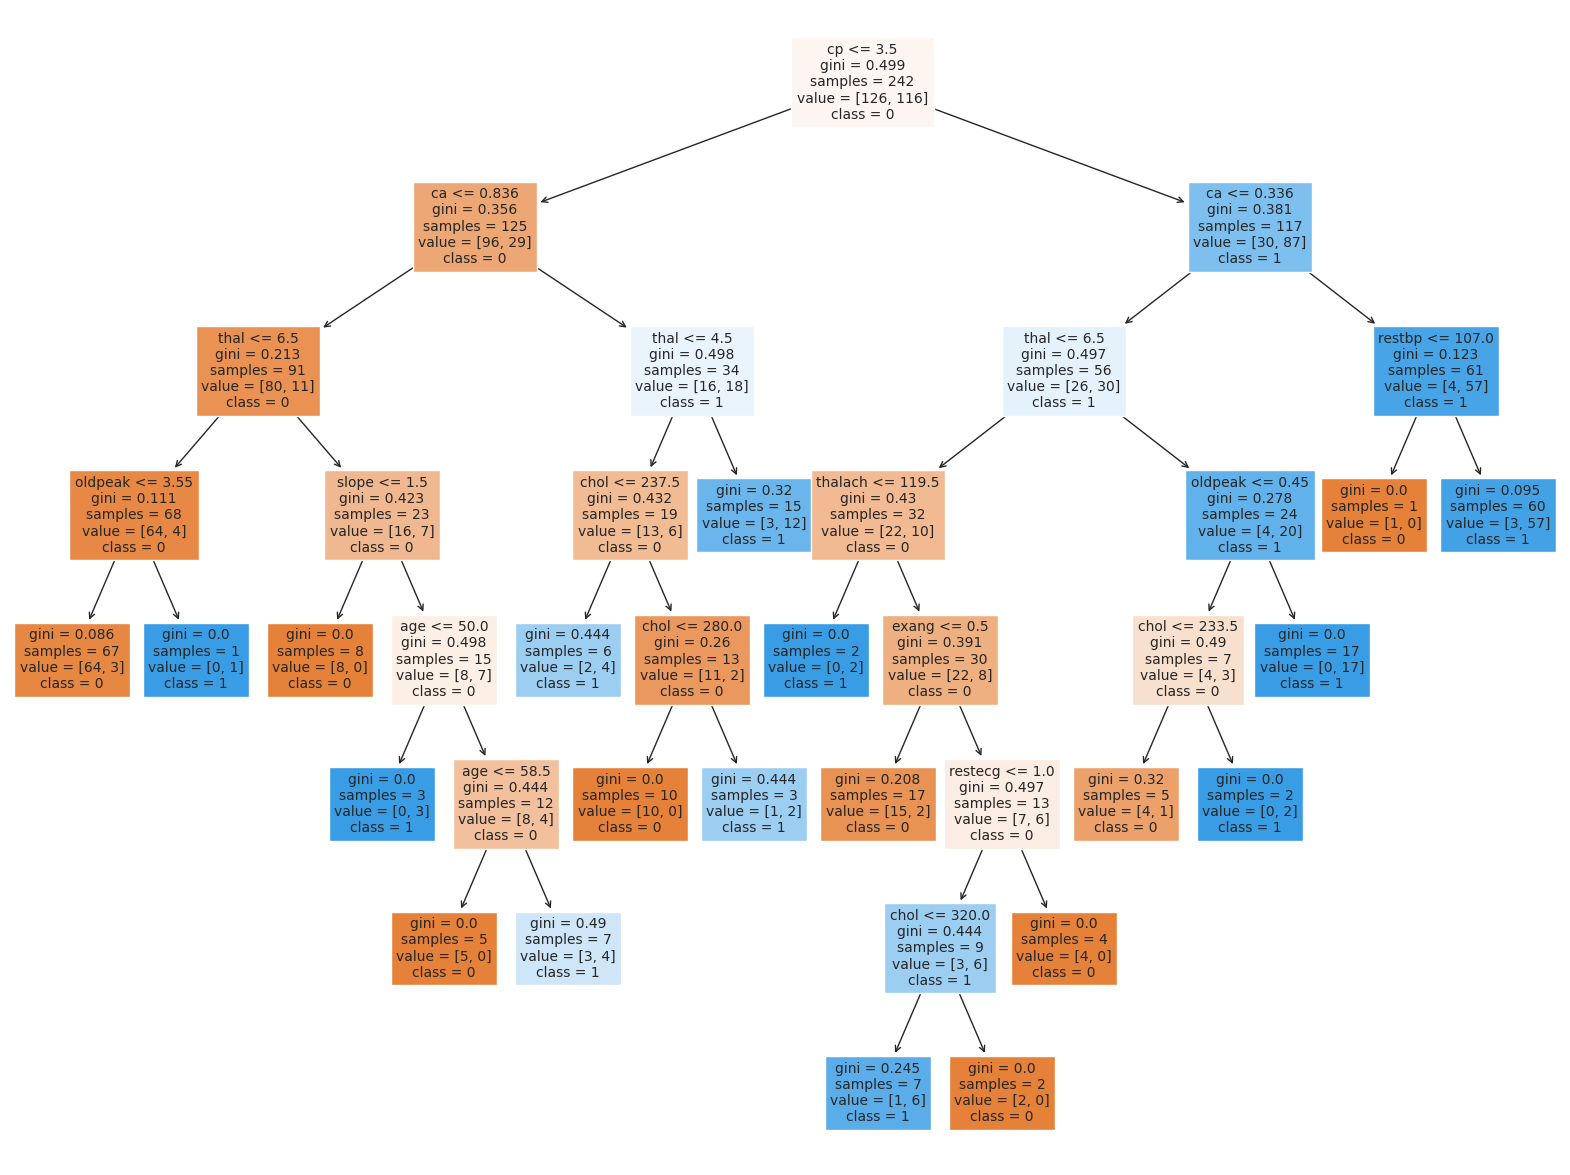

In [ ]:
param_grid = {'max_leaf_nodes': [5, 10, 15, 20, 25]}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_classifier = grid_search.best_estimator_

plt.figure(figsize = (20, 15))
plot_tree(best_classifier, filled = True, feature_names = X_train.columns, class_names=list(map(str, best_classifier.classes_)), fontsize=10)
plt.show()

In [ ]:
def printConfusionMatrix(y_test,y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    percent_survivors_correct = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    percent_fatalities_correct = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

    print(f"Percent Patients with heart disease Correctly Predicted: {percent_survivors_correct:.2%}")
    print(f"Percent Patients without heart disease Correctly Predicted: {percent_fatalities_correct:.2%}")



In [ ]:
y_pred = best_classifier.predict(X_test)

printConfusionMatrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

Percent Patients with heart disease Correctly Predicted: 65.79%
Percent Patients without heart disease Correctly Predicted: 73.91%
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        38
           1       0.57      0.74      0.64        23

    accuracy                           0.69        61
   macro avg       0.69      0.70      0.68        61
weighted avg       0.72      0.69      0.69        61



#### Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(max_leaf_nodes = 20)
rf_clf.fit(X_train, y_train)
rd_predict = rf_clf.predict(X_test)
printConfusionMatrix(y_test, rd_predict)

Percent Patients with heart disease Correctly Predicted: 89.47%
Percent Patients without heart disease Correctly Predicted: 82.61%


In [ ]:
print(classification_report(y_test, rd_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.83      0.83      0.83        23

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



#### K Nearest Neighbor (KNN)

In [ ]:
# Preparing data
X = df_formatted.drop('target', axis=1)  # Features
y = df_formatted['target']               # Target variable

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.9180327868852459
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



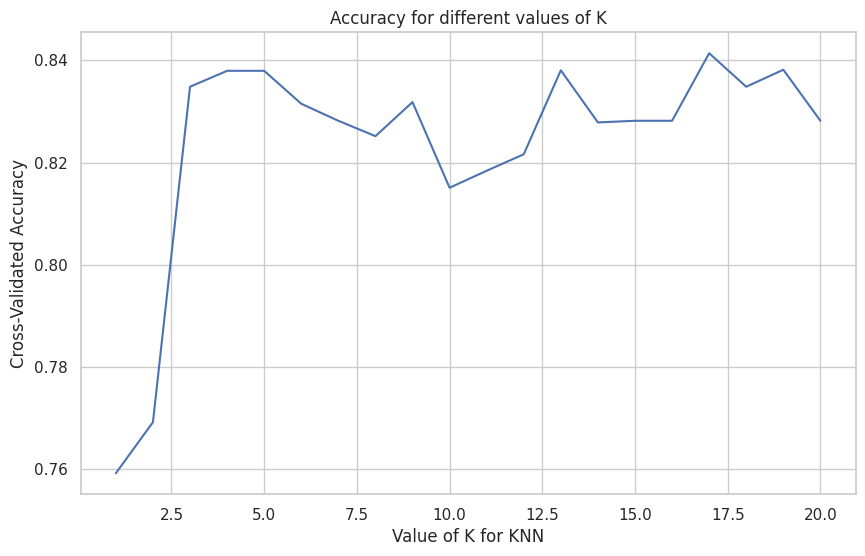

(17, 0.8413978494623656)

In [ ]:
from sklearn.model_selection import cross_val_score

# Testing different values of k
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy for different values of K')
plt.show()

# Best k value and its accuracy
best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)
best_k, best_accuracy


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic Regression model for RFE
logreg = LogisticRegression()

# Create the RFE model and select 5 attributes
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

# Summarize the selection of the attributes
selected_features = pd.DataFrame({'Feature':df_formatted.columns[:-1], 'Ranking':rfe.ranking_, 'Selected':rfe.support_})
selected_features

,Feature,Ranking,Selected
0,age,9,False
1,sex,2,False
2,cp,1,True
3,restbp,6,False
4,chol,3,False
5,fbs,7,False
6,restecg,8,False
7,thalach,5,False
8,exang,1,True
9,oldpeak,1,True


In [ ]:
# Selecting only the important features for training
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

# Retraining the KNN model with k=17 using selected features
knn_selected = KNeighborsClassifier(n_neighbors=17)
knn_selected.fit(X_train_selected, y_train)

# Predicting the test set results with selected features
y_pred_selected = knn_selected.predict(X_test_selected)

# Evaluating the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_rep_selected = classification_report(y_test, y_pred_selected)

print(accuracy_selected)
print(classification_rep_selected)


0.8852459016393442
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

